<a href="https://colab.research.google.com/github/wjficap/wavefront/blob/main/Fund_Returns_v210924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

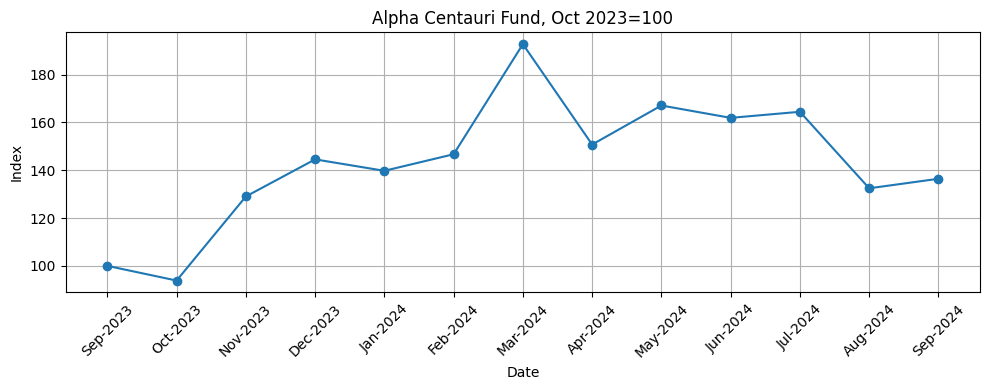

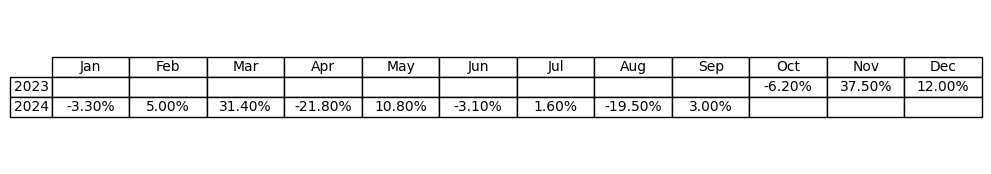

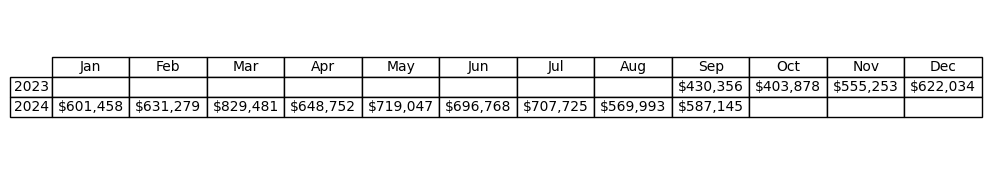

In [ ]:
# @title AUM return v4 {"vertical-output":true}

import pandas as pd
import matplotlib.pyplot as plt

# Data (Adjusted AUM as at 30/31st of month - already includes deposits/withdrawals)
aum_values = [587145, 569993, 707725, 696768, 719047, 648752, 829481, 631279, 601458, 622034, 555253, 403878, 430356]
dates = ['Sep-2024', 'Aug-2024', 'Jul-2024', 'Jun-2024', 'May-2024', 'Apr-2024',
         'Mar-2024', 'Feb-2024', 'Jan-2024', 'Dec-2023', 'Nov-2023', 'Oct-2023', 'Sep-2023']

# Example adjustment inputs (positive for deposits, negative for withdrawals)
aum_adjustments = {
    'Apr-2024': 0,  # (negative) Investor Redemption in month of April 2024
    'Jul-2024': 0,  # (positive) Investor New Funds in month of July 2024
}

# Create DataFrame
df = pd.DataFrame({
    'Date': pd.to_datetime(dates, format='%b-%Y'),
    'AUM': aum_values
})

# Sort by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Add a column for Amount Taken Out/Entered (withdrawals/deposits)
df['+/-'] = df['Date'].dt.strftime('%b-%Y').map(aum_adjustments).fillna(0).astype(int)

# Reverse the adjustment to get unadjusted AUM (AUM before deposits/withdrawals)
df['AUM (GrossUp)'] = df['AUM'] - df['+/-']

# Create Index using Unadjusted AUM (starting at 100)
df['Index'] = (df['AUM (GrossUp)'] / df['AUM (GrossUp)'].iloc[0]) * 100

# Round the Index to 2 decimal places
df['Index'] = df['Index'].round(2)

# Calculate percentage returns based on Unadjusted AUM change (monthly returns)
df['Returns (%)'] = df['AUM (GrossUp)'].pct_change() * 100

# Round the Returns to 1 decimal place
df['Returns (%)'] = df['Returns (%)'].round(1)

# Format Date as dd-mmm-yyyy
df['Date'] = df['Date'].dt.strftime('%b-%Y')

# Display the DataFrame (make it as a comment if you don't want to print this)
# print(df)

# Plot the Index
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Index'], marker='o')
plt.title('Alpha Centauri Fund, Oct 2023=100')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create Year and Month columns for the pivot table
df['Year'] = pd.to_datetime(df['Date'], format='%b-%Y').dt.year
df['Month'] = pd.to_datetime(df['Date'], format='%b-%Y').dt.strftime('%b')

# Pivot table of returns
pivot_table_returns = df.pivot(index='Year', columns='Month', values='Returns (%)')

# Reorder the months to ensure the correct sequence
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_table_returns = pivot_table_returns.reindex(columns=month_order)

# Format the table values with % symbol using map
pivot_table_returns = pivot_table_returns.apply(lambda col: col.map(lambda x: f"{x:.2f}%" if pd.notnull(x) else ""))

# Create a figure for the returns table
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the returns table
table_returns = ax.table(cellText=pivot_table_returns.values,
                          colLabels=pivot_table_returns.columns,
                          rowLabels=pivot_table_returns.index,
                          cellLoc='center',
                          loc='center')

# Adjust table properties
table_returns.auto_set_font_size(False)
table_returns.set_fontsize(10)
table_returns.scale(1.2, 1.2)  # Adjust scale for better display

# Display the returns table
plt.show()

# Pivot table of AUM
pivot_table_aum = df.pivot(index='Year', columns='Month', values='AUM (GrossUp)')

# Reorder the months to ensure the correct sequence
pivot_table_aum = pivot_table_aum.reindex(columns=month_order)

# Format the AUM table values with dollar signs and commas
pivot_table_aum = pivot_table_aum.apply(lambda col: col.map(lambda x: f"${int(x):,}" if pd.notnull(x) else ""))

# Create a figure for the AUM table
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the AUM table
table_aum = ax.table(cellText=pivot_table_aum.values,
                     colLabels=pivot_table_aum.columns,
                     rowLabels=pivot_table_aum.index,
                     cellLoc='center',
                     loc='center')

# Adjust table properties
table_aum.auto_set_font_size(False)
table_aum.set_fontsize(10)
table_aum.scale(1.2, 1.2)  # Adjust scale for better display

# Display the AUM table
plt.show()


        Date     AUM  +/-  AUM (GrossUp)   Index  Returns (%)
0   Oct-2023  430356    0         430356  100.00          NaN
1   Nov-2023  403878    0         403878   93.85         -6.2
2   Dec-2023  555253    0         555253  129.02         37.5
3   Jan-2024  622034    0         622034  144.54         12.0
4   Feb-2024  601458    0         601458  139.76         -3.3
5   Mar-2024  631279    0         631279  146.69          5.0
6   Apr-2024  829481    0         829481  192.74         31.4
7   May-2024  648752    0         648752  150.75        -21.8
8   Jun-2024  719047    0         719047  167.08         10.8
9   Jul-2024  696768    0         696768  161.91         -3.1
10  Aug-2024  707725    0         707725  164.45          1.6
11  Sep-2024  569993    0         569993  132.45        -19.5
12  Oct-2024  587145    0         587145  136.43          3.0


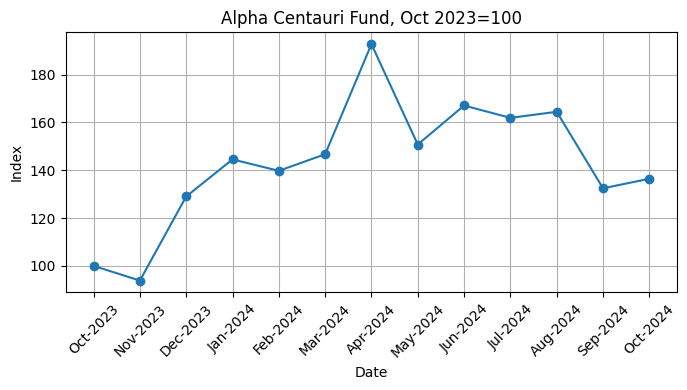

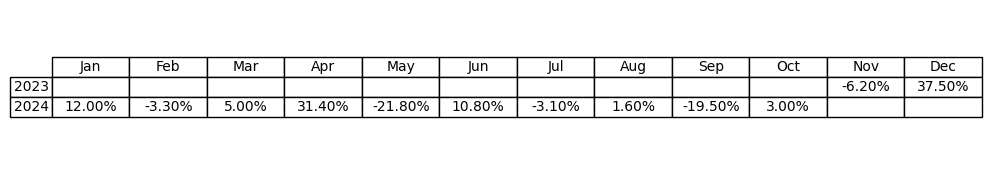

In [ ]:
# @title AUM return v3 {"vertical-output":true}

import pandas as pd
import matplotlib.pyplot as plt

# Data (Adjusted AUM - already includes deposits/withdrawals)
aum_values = [587145, 569993, 707725, 696768, 719047, 648752, 829481, 631279, 601458, 622034, 555253, 403878, 430356]
dates = ['Oct-2024', 'Sep-2024', 'Aug-2024', 'Jul-2024', 'Jun-2024', 'May-2024', 'Apr-2024',
         'Mar-2024', 'Feb-2024', 'Jan-2024', 'Dec-2023', 'Nov-2023', 'Oct-2023']

# Example adjustment inputs (positive for deposits, negative for withdrawals)
aum_adjustments = {
    'Apr-2024': 0,  # (negative) Investor Redemption in April 2024
    'Jul-2024': 0,  # (positive) Investor New Funds in July 2024
}

# Create DataFrame
df = pd.DataFrame({
    'Date': pd.to_datetime(dates, format='%b-%Y'),
    'AUM': aum_values
})

# Sort by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Add a column for Amount Taken Out/Entered (withdrawals/deposits)
df['+/-'] = df['Date'].dt.strftime('%b-%Y').map(aum_adjustments).fillna(0).astype(int)

# Reverse the adjustment to get unadjusted AUM (AUM before deposits/withdrawals)
df['AUM (GrossUp)'] = df['AUM'] - df['+/-']

# Create Index using Unadjusted AUM (starting at 100)
df['Index'] = (df['AUM (GrossUp)'] / df['AUM (GrossUp)'].iloc[0]) * 100

# Round the Index to 2 decimal places
df['Index'] = df['Index'].round(2)

# Calculate percentage returns based on Unadjusted AUM change (monthly returns)
df['Returns (%)'] = df['AUM (GrossUp)'].pct_change() * 100

# Round the Returns to 1 decimal place
df['Returns (%)'] = df['Returns (%)'].round(1)

# Format Date as dd-mmm-yyyy
df['Date'] = df['Date'].dt.strftime('%b-%Y')

# Display the DataFrame
print(df)

# Plot the Index
plt.figure(figsize=(7, 4))
plt.plot(df['Date'], df['Index'], marker='o')
plt.title('Alpha Centauri Fund, Oct 2023=100')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

# Create Year and Month columns for the pivot table
df['Year'] = pd.to_datetime(df['Date'], format='%b-%Y').dt.year
df['Month'] = pd.to_datetime(df['Date'], format='%b-%Y').dt.strftime('%b')

# Pivot table of returns
pivot_table = df.pivot(index='Year', columns='Month', values='Returns (%)')

# Reorder the months to ensure the correct sequence
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_table = pivot_table.reindex(columns=month_order)

# Format the table values with % symbol using map
pivot_table = pivot_table.apply(lambda col: col.map(lambda x: f"{x:.2f}%" if pd.notnull(x) else ""))

# Create a figure for the table
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=pivot_table.values,
                 colLabels=pivot_table.columns,
                 rowLabels=pivot_table.index,
                 cellLoc='center',
                 loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust scale for better display

# Display the table
plt.show()



        Date     AUM  +/-  AUM (GrossUp)   Index  Returns (%)
0   Oct-2023  430356    0         430356  100.00          NaN
1   Nov-2023  403878    0         403878   93.85         -6.2
2   Dec-2023  555253    0         555253  129.02         37.5
3   Jan-2024  622034    0         622034  144.54         12.0
4   Feb-2024  601458    0         601458  139.76         -3.3
5   Mar-2024  631279    0         631279  146.69          5.0
6   Apr-2024  829481    0         829481  192.74         31.4
7   May-2024  648752    0         648752  150.75        -21.8
8   Jun-2024  719047    0         719047  167.08         10.8
9   Jul-2024  696768    0         696768  161.91         -3.1
10  Aug-2024  707725    0         707725  164.45          1.6
11  Sep-2024  569993    0         569993  132.45        -19.5
12  Oct-2024  587145    0         587145  136.43          3.0


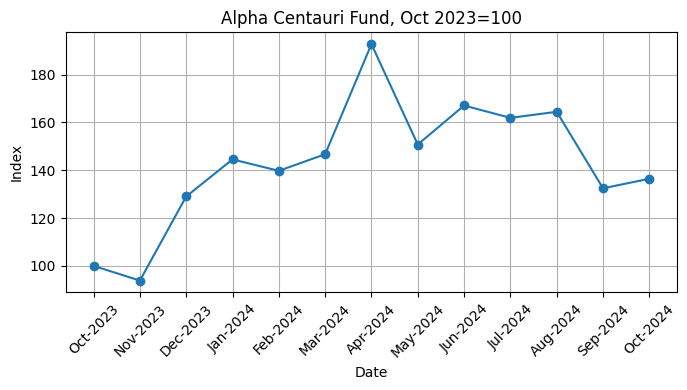

In [ ]:
# @title AUM return v2 {"vertical-output":true}

import pandas as pd
import matplotlib.pyplot as plt

# Data (Adjusted AUM - already includes deposits/withdrawals)
aum_values = [587145, 569993, 707725, 696768, 719047, 648752, 829481, 631279, 601458, 622034, 555253, 403878, 430356]
dates = ['Oct-2024', 'Sep-2024', 'Aug-2024', 'Jul-2024', 'Jun-2024', 'May-2024', 'Apr-2024',
         'Mar-2024', 'Feb-2024', 'Jan-2024', 'Dec-2023', 'Nov-2023', 'Oct-2023']

# Example adjustment inputs (positive for deposits, negative for withdrawals)
aum_adjustments = {
    'Apr-2024': 0,  # (negative) Investor Redemption in April 2024
    'Jul-2024': 0,  # (positive) Investor New Funds in July 2024
}

# Create DataFrame
df = pd.DataFrame({
    'Date': pd.to_datetime(dates, format='%b-%Y'),
    'AUM': aum_values
})

# Sort by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Add a column for Amount Taken Out/Entered (withdrawals/deposits)
df['+/-'] = df['Date'].dt.strftime('%b-%Y').map(aum_adjustments).fillna(0).astype(int)

# Reverse the adjustment to get unadjusted AUM (AUM before deposits/withdrawals)
df['AUM (GrossUp)'] = df['AUM'] - df['+/-']

# Create Index using Unadjusted AUM (starting at 100)
df['Index'] = (df['AUM (GrossUp)'] / df['AUM (GrossUp)'].iloc[0]) * 100

# Round the Index to 2 decimal places
df['Index'] = df['Index'].round(2)

# Calculate percentage returns based on Unadjusted AUM change (monthly returns)
df['Returns (%)'] = df['AUM (GrossUp)'].pct_change() * 100

# Round the Returns to 1 decimal place
df['Returns (%)'] = df['Returns (%)'].round(1)

# Format Date as dd-mmm-yyyy
df['Date'] = df['Date'].dt.strftime('%b-%Y')

# Display the DataFrame
print(df)

# Plot the Index
plt.figure(figsize=(7, 4))
plt.plot(df['Date'], df['Index'], marker='o')
plt.title('Alpha Centauri Fund, Oct 2023=100')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()






         Date     AUM   Index  Returns (%)
0  2023-10-01  430356  100.00          NaN
1  2023-11-01  403878   93.85         -6.2
2  2023-12-01  555253  129.02         37.5
3  2024-01-01  622034  144.54         12.0
4  2024-02-01  601458  139.76         -3.3
5  2024-03-01  631279  146.69          5.0
6  2024-04-01  829481  192.74         31.4
7  2024-05-01  648752  150.75        -21.8
8  2024-06-01  719047  167.08         10.8
9  2024-07-01  696768  161.91         -3.1
10 2024-08-01  707725  164.45          1.6
11 2024-09-01  569993  132.45        -19.5
12 2024-10-01  589000  136.86          3.3


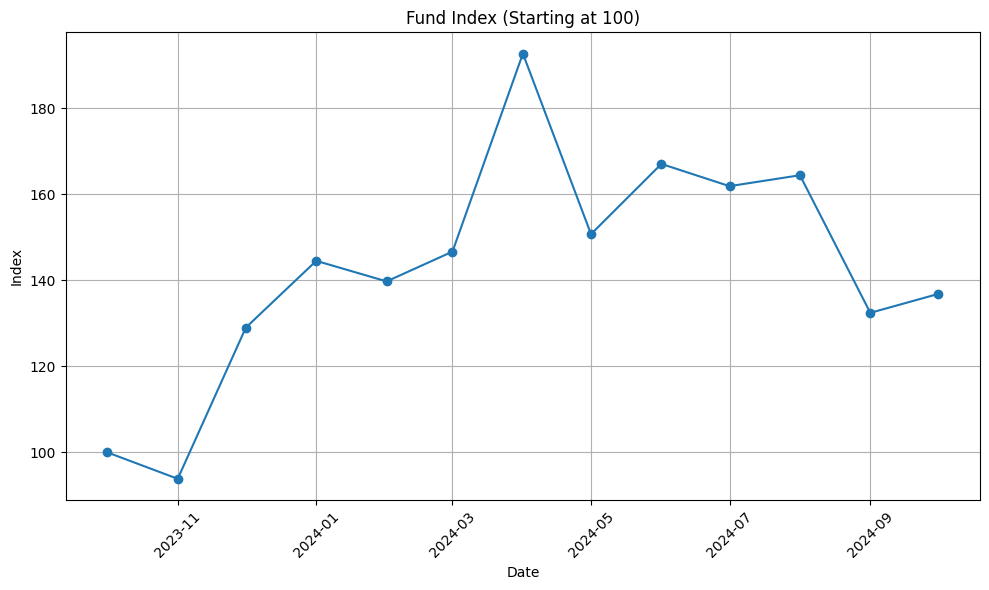

In [ ]:
# @title AUM return v1 {"vertical-output":true}
import pandas as pd
import matplotlib.pyplot as plt

# Data
aum_values = [589000, 569993, 707725, 696768, 719047, 648752, 829481, 631279, 601458, 622034, 555253, 403878, 430356]
dates = ['Oct-2024', 'Sep-2024', 'Aug-2024', 'Jul-2024', 'Jun-2024', 'May-2024', 'Apr-2024',
         'Mar-2024', 'Feb-2024', 'Jan-2024', 'Dec-2023', 'Nov-2023', 'Oct-2023']

# Create DataFrame
df = pd.DataFrame({
    'Date': pd.to_datetime(dates, format='%b-%Y'),
    'AUM': aum_values
})

# Sort by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Create Index starting from 100 on 1-Oct-2023
df['Index'] = (df['AUM'] / df['AUM'].iloc[0]) * 100

# Round the Index to 2 decimal places
df['Index'] = df['Index'].round(2)

# Calculate percentage returns based on AUM change (monthly returns)
df['Returns (%)'] = df['AUM'].pct_change() * 100

# Round the Returns to 1 decimal place
df['Returns (%)'] = df['Returns (%)'].round(1)

# Display the DataFrame
print(df)

# Plot the Index
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Index'], marker='o')
plt.title('Fund Index (Starting at 100)')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Show plot
plt.show()
